# Toybox High Aspect Ratio equilibirum



In [1]:
import numpy as np
from pyoculus.fields import AnalyticCylindricalBfield
from pyoculus.maps import CylindricalBfieldSection
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
bfield = AnalyticCylindricalBfield(6, 0, 1, 0.5)

In [4]:
section = CylindricalBfieldSection(bfield, R0=6, Z0=0, rtol=1e-12, nsteps=1e4)

### Plotting the unperturbed equilibrium 

In [5]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)

In [ ]:
pplot.compute(compute_iota=True)

In [ ]:
fig, ax = pplot.plot()
ax.scatter(section.R0, section.Z0)

In [ ]:
pplot.compute_iota()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

## Adding the maxwellian perturbation

In [5]:
maxwellboltzmann = {"R": section.R0, "Z": section.Z0,
                    "m": 3, "n": -2, "d": 1.75/np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}
bfield.add_perturbation(maxwellboltzmann)

section.clear_cache()
section.find_axis()

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6. 0.]
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [0. 0.]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6. 0.]. Computing additional data...


In [6]:
fp_x1 = FixedPoint(section)
guess = [5.05, 0]

fp_x1.find(3, guess)
# fp01.find_with_iota(0, 1, guess)

fp_x1._found_by_iota = True
fp_x1._m = 3

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [5.05 0.  ]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [ 0.26576426 -0.44516152]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step : [-0.07551086 -0.12133307]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [ 4.97448914 -0.12133307]
INFO:pyoculus.solvers.fixed_point:Newton 1 - delta_x : [-0.00742598  0.29070084]
INFO:pyoculus.solvers.fixed_point:Newton 1 - step : [0.03294384 0.09750858]
INFO:pyoculus.solvers.fixed_point:Newton 2 - x : [ 5.00743299 -0.02382449]
INFO:pyoculus.solvers.fixed_point:Newton 2 - delta_x : [-0.01320026  0.09889978]
INFO:pyoculus.solvers.fixed_point:Newton 2 - step : [0.01069784 0.01841836]
INFO:pyoculus.solvers.fixed_point:Newton 3 - x : [ 5.01813083 -0.00540613]
INFO:pyoculus.solvers.fixed_point:Newton 3 - delta_x : [0.00193401 0.00457579]
INFO:pyoculus.solvers.fixed_point:Newton 3 - step : [0.0019237  0.00543216]
INFO:pyoculus.solvers.fixed_point:Newton 4 - x : [5.02005453e+00 2.60268730e-05]
INFO:

In [ ]:
pplot = PoincarePlot.with_horizontal(section, 1, 10)
pplot.compute(compute_iota=True)
fig, ax = pplot.plot()
ax.scatter(section.R0, section.Z0)
fp_x1.plot(ax=ax)

In [ ]:
pplot.compute_iota()
import matplotlib.pyplot as plt
plt.plot(np.linalg.norm(pplot.xs, axis=1), 1 / pplot.iota)

In [7]:
fp_x2 = FixedPoint(section)

fp_x2.find(3, fp_x1.coords[1])
# fp01.find_with_iota(0, 1, guess)

fp_x2._found_by_iota = True
fp_x2._m = 3

INFO:pyoculus.solvers.fixed_point:Newton 0 - x : [6.37050595 0.92340241]
INFO:pyoculus.solvers.fixed_point:Newton 0 - delta_x : [-1.27322153e-10  9.62963043e-12]
INFO:pyoculus.solvers.fixed_point:Newton 0 - step : [5.86197757e-12 2.78355117e-12]
INFO:pyoculus.solvers.fixed_point:Newton 1 - x : [6.37050595 0.92340241]
INFO:pyoculus.solvers.fixed_point:Newton 1 - delta_x : [-6.48370246e-14  2.88657986e-15]
INFO:pyoculus.solvers.fixed_point:Found fixed point at [6.37050595 0.92340241]. Computing additional data...


In [ ]:
Manifold.show_directions(fp_x1, fp_x2, ax=ax)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

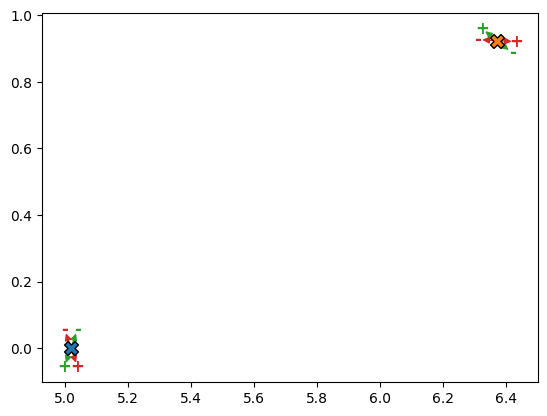

In [8]:
Manifold.show_directions(fp_x1, fp_x2)

### Inner turnstile

In [9]:
inner_manifold = Manifold(section, fp_x1, fp_x2, '-', '-', True)

In [ ]:
inner_manifold.compute(nint_s=8, nint_u=8)
inner_manifold.plot("stable", rm_points=4, ax=ax)
inner_manifold.plot("unstable", rm_points=4, ax=ax)

In [ ]:
eps_guess_s = inner_manifold.find_epsilon("stable")
eps_guess_u = inner_manifold.find_epsilon("unstable")

In [ ]:
inner_manifold.find_clinics(1e-7, 1e-7, n_points=4, shift=-1)

In [ ]:
inner_manifold.plot_clinics(ax=ax)

In [ ]:
inner_manifold._clinics._tuples

In [ ]:
fig

In [ ]:
inner_manifold.turnstile_area()

### Outer turnstile

In [38]:
outer_manifold = Manifold(section, fp_x1, fp_x2, '+', '-', False)

In [ ]:
outer_manifold.compute(nint_s=8, nint_u=8)
outer_manifold.plot("stable", rm_points=4, ax=ax)
outer_manifold.plot("unstable", rm_points=4, ax=ax)

In [ ]:
eps_guess_s = outer_manifold.find_epsilon("stable")
eps_guess_u = outer_manifold.find_epsilon("unstable")

In [ ]:
outer_manifold.find_clinics(eps_guess_s, eps_guess_u, n_points=4, shift=1, root_args={"method": "lm"})

In [ ]:
outer_manifold.find_clinic_single(eps_guess_s * np.power(outer_manifold.lambda_s, -3/4),
                                  eps_guess_u * np.power(outer_manifold.lambda_u, 3/4), 
                                  n_s=8, n_u=7, root_args={"method": "lm"}
)

In [ ]:
outer_manifold.plot_clinics(ax=ax)

In [ ]:
fig

In [ ]:
outer_manifold._clinics._tuples

In [ ]:
fig

In [ ]:
outer_manifold.turnstile_area()